In [6]:
import wandb
import pandas as pd

api = wandb.Api()

run = api.run(
    "ayush_sur-national-institute-of-technlogy-kurukshetra/text2image-fine-tune/j5p1g4pa"
)

rows = []
for row in run.scan_history():
    rows.append(row)

df = pd.DataFrame(rows)
print(df.shape)

(4981, 5)


In [7]:
df.head()

,train_loss,validation,_step,_runtime,_timestamp
0,0.158384,None,1,7.773609,1.763831e+09
1,0.099112,None,2,10.836080,1.763831e+09
2,0.137141,None,3,13.911355,1.763831e+09
3,0.078394,None,4,17.014436,1.763831e+09
4,0.077896,None,5,20.113569,1.763831e+09


In [24]:
df["loss_avg_50"] = df["train_loss"].rolling(50).mean()
df["trend"] = df["train_loss"].rolling(1000).mean()

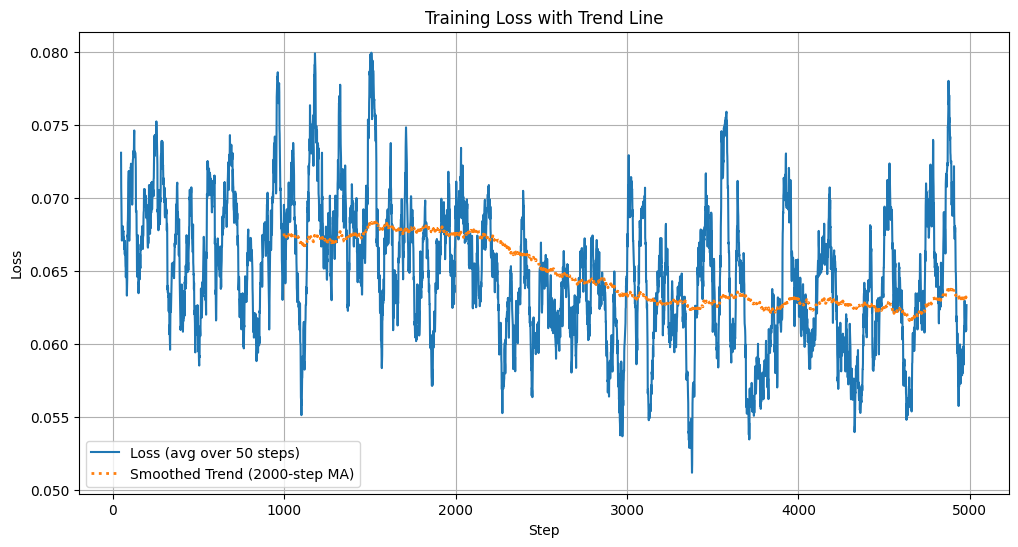

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Noisy average
plt.plot(df["loss_avg_50"], label="Loss (avg over 50 steps)")

# Smooth dotted trend line
plt.plot(df["trend"], linestyle=":", linewidth=2, label="Smoothed Trend (2000-step MA)")

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training Loss with Trend Line")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
n = 500

In [28]:
first_500_avg = df["train_loss"].head(n).mean()
last_500_avg = df["train_loss"].tail(n).mean()

print("Avg loss (first 500):", first_500_avg)
print("Avg loss (last 500):", last_500_avg)

Avg loss (first 500): 0.06776419130712748
Avg loss (last 500): 0.06440320606157184
